In [1]:
## import libraries
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.utils import get_file
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# # URL of the dataset zip file
# url = "https://storage.googleapis.com/learning-datasets/horse-or-human.zip"

# # Download and extract the dataset
# dataset_path = get_file("horse-or-human.zip", origin=url, extract=True)

In [3]:
import os
from dotenv import load_dotenv
load_dotenv()
train_horse_dir = os.getenv("DATASET_TRAIN_DIR_HORSE_OR_HUMAN")
train_human_dir = os.getenv("DATASET_VALIDATION_DIR_HORSE_OR_HUMAN")

In [5]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse01-0.png', 'horse01-1.png', 'horse01-2.png', 'horse01-3.png', 'horse01-4.png', 'horse01-5.png', 'horse01-6.png', 'horse01-7.png', 'horse01-8.png', 'horse01-9.png']
['human01-00.png', 'human01-01.png', 'human01-02.png', 'human01-03.png', 'human01-04.png', 'human01-05.png', 'human01-06.png', 'human01-07.png', 'human01-08.png', 'human01-09.png']


In [7]:
print('Total training horse images :', len(train_horse_names))
print('Total training human images :', len(train_human_names))

Total training horse images : 500
Total training human images : 527


In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

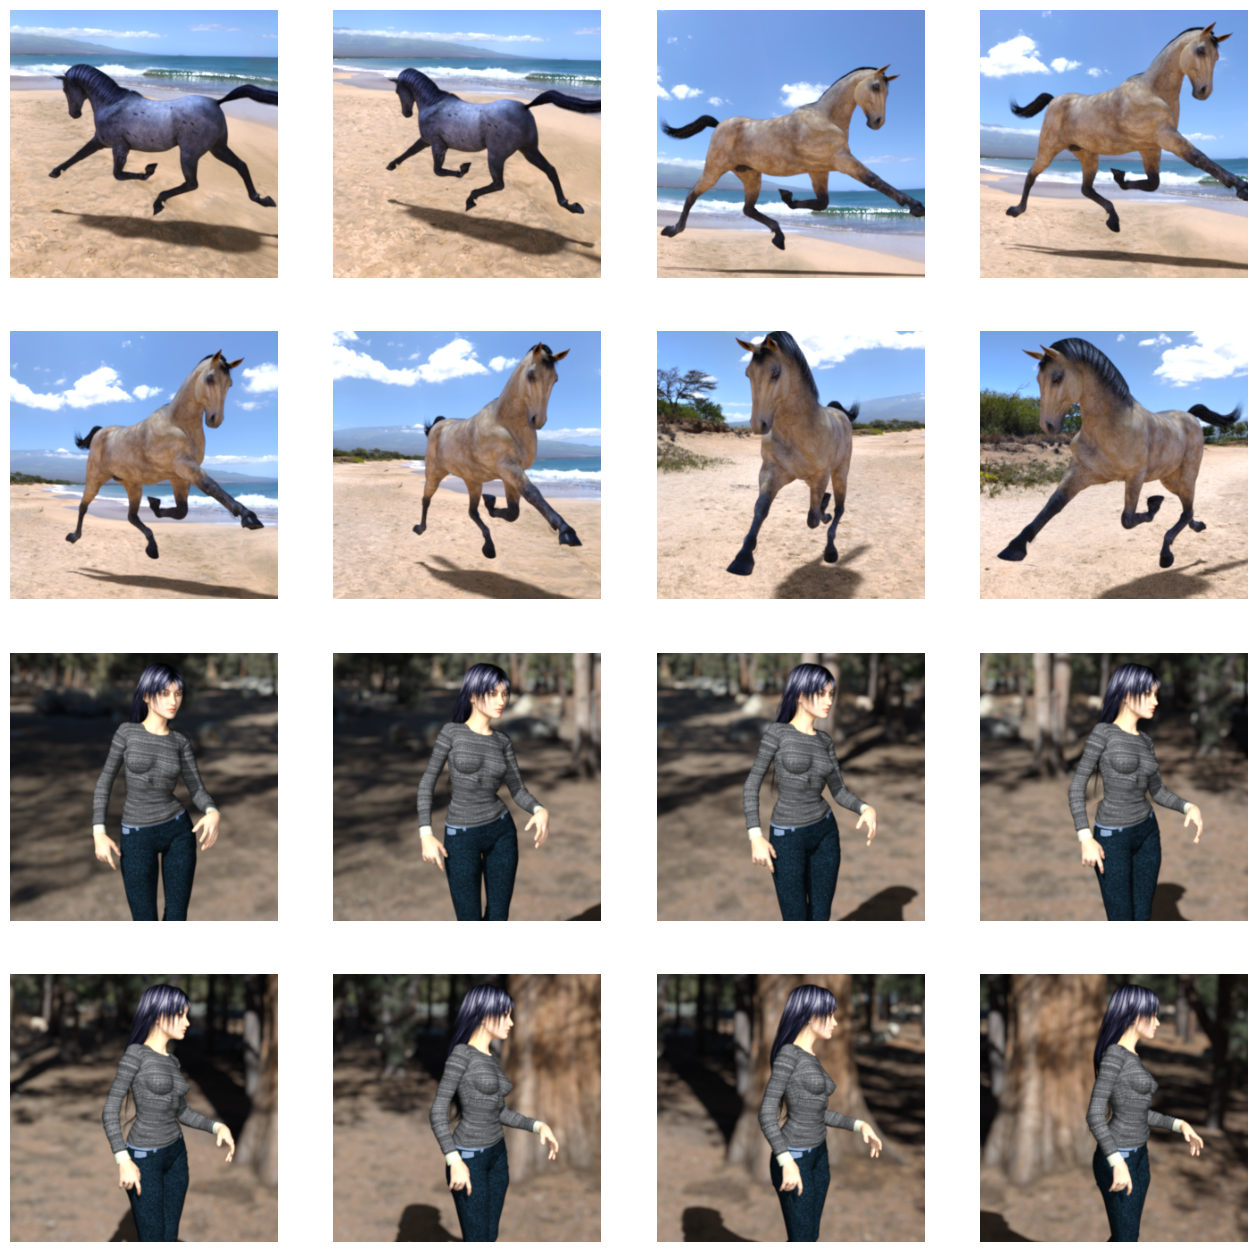

In [24]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [25]:
# Auto Image
# train_datagen = ImageDataGenerator(rescale=1./255)

In [26]:
# train_generator = train_datagen.flow_from_directory(
#     train_dir,
#     target_size= (300, 300),
#     batch_size= 128,
#     class_mode= 'binary'
# )

In [27]:
# validation_generator = train_datagen.flow_from_directory(
#     validation_dir,
#     target_size= (300, 300),
#     batch_size= 32,
#     class_mode= 'binary'
# )

In [28]:
model = tf.keras.models.Sequential([
    keras.layers.Conv2D(16, (3,3), activation= 'relu', input_shape= (300, 300, 3)),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(32, (3,3), activation= 'relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(64, (3,3), activation= 'relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(64, (3,3), activation= 'relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(64, (3,3), activation= 'relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 64)        0

In [31]:
model.compile(loss='binary_crossentropy',
              optimizer= keras.optimizers.RMSprop(learning_rate= 0.001),
              metrics= ['accuracy'])

In [34]:
# Auto Image
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    "C:/Users/ei12078/.keras/datasets/horses_or_humans",
    target_size= (300, 300),
    batch_size= 128,
    class_mode= 'binary'
)

Found 1027 images belonging to 2 classes.


In [35]:
model.fit(
    train_generator,
    steps_per_epoch= 8,
    epochs= 15,
    verbose= 1
)

Epoch 1/15



8/8 [==============================] - 43s 4s/step - loss: 0.8693 - accuracy: 0.5239
Epoch 2/15
8/8 [==============================] - 35s 4s/step - loss: 0.6609 - accuracy: 0.6211
Epoch 3/15
8/8 [==============================] - 31s 4s/step - loss: 1.0230 - accuracy: 0.6908
Epoch 4/15
8/8 [==============================] - 30s 4s/step - loss: 0.5028 - accuracy: 0.7809
Epoch 5/15
8/8 [==============================] - 31s 3s/step - loss: 0.3144 - accuracy: 0.8665
Epoch 6/15
8/8 [==============================] - 33s 4s/step - loss: 0.3849 - accuracy: 0.8545
Epoch 7/15
8/8 [==============================] - 24s 3s/step - loss: 0.1368 - accuracy: 0.9611
Epoch 8/15
8/8 [==============================] - 25s 3s/step - loss: 0.1087 - accuracy: 0.9622
Epoch 9/15
8/8 [==============================] - 31s 4s/step - loss: 0.0836 - accuracy: 0.9733
Epoch 10/15
8/8 [==============================] - 30s 4s/step - loss: 0.1129 - accuracy: 0.9588
Epoch 11/15
8/8 [==============================] -

In [ ]:
model.fit(
    train_generator,
    steps_per_epoch= 8,
    epochs= 15,
    validation_data= validation_generator,
    validation_steps= 8,
    verbose= 2
)